In [1]:
import tensorflow as tf
import cv2
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import os
from  utils import *
%matplotlib inline

2024-03-14 22:16:20.408845: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 22:16:20.446343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 22:16:21.058104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1. Load the gas cylinder detection model

Note: the warning "WARNING:absl:Importing a function (__inference_internal_grad_fn_995339)...." is normal

In [2]:
model_dir = "./exported_model" # Directory where the gas cylinder detection model is saved
imported = tf.saved_model.load(model_dir) # Load the model
gas_cylinder_detector = imported.signatures['serving_default'] #inference graph

2024-03-14 22:16:22.234441: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-14 22:16:22.234482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: x299-ud4-pro
2024-03-14 22:16:22.234489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: x299-ud4-pro
2024-03-14 22:16:22.234623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.147.5
2024-03-14 22:16:22.234653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.147.5
2024-03-14 22:16:22.234658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 525.147.5


### 2. Load and display test images

We provide 10 test images scrapped on the internet for you to play with. These images are different from the test images used during the thesis' work for confidentiality reasons\
Feel free to find more images on the Internet by typing "industrial gas cylinder nitrogen" or "industrial gas cylinder argon", etc.. However it is important to note that the gas cylinder detection model was optimized for gas cylinders fitted with shrouds, and for camera viewpoints with elevation higher than the cylinder. Many images of gas cylinder out there does not show any shroud fitted (very very bad idea...) and have a viewpoint lower that the top of the cylinder. 

In [17]:
#load the paths to the 10 test images 
test_image_paths = [os.path.join('./test_images',f) for f in os.listdir('./test_images')]

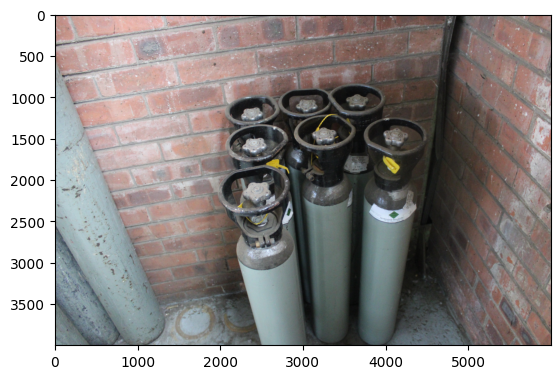

In [18]:
#select one of the test image provided (change the index to select a different image). 
#OR provide the path to your own image
test_image_path = test_image_paths[7]

#load and display the image
original_img = cv2.imread(test_image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.imshow(original_img)  

### 3. Pre-process the image for inference

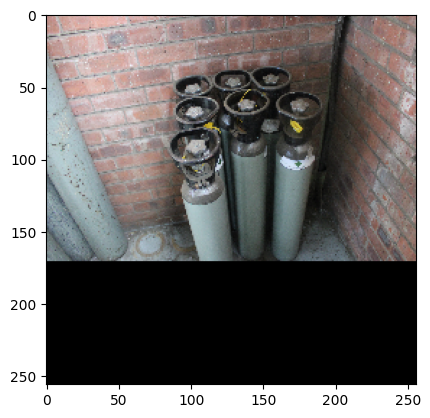

In [19]:
#Resize the image to 256x256
resized_img, resize_info = build_inputs_for_object_detection(original_img, (256,256))

#Adjust shape and type
resized_img = tf.expand_dims(resized_img, axis=0)
resized_img = tf.cast(resized_img, dtype = tf.uint8)
#display the pre-processed image
plt.imshow(resized_img[0])  

### 4. Inference

In [15]:
predictions = gas_cylinder_detector(resized_img)

### 5. Visualization

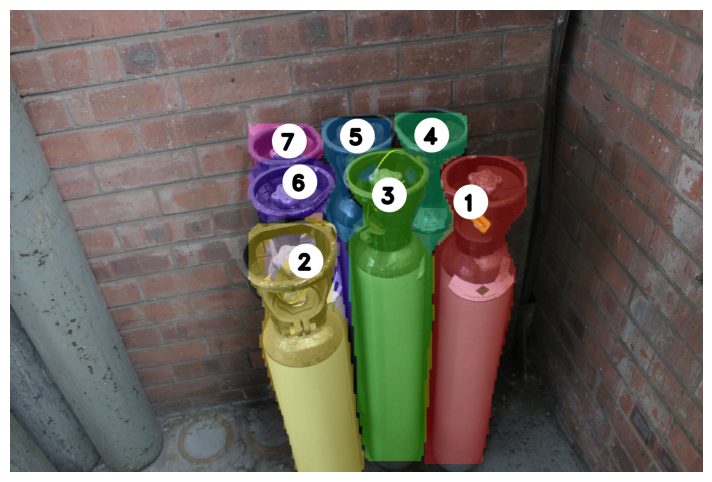

In [20]:
visualize_prediction(predictions, original_img, resized_img, resize_info)